# Exploratory Data Analysis and WordCloud Creation
This notebook analyzes bbm_tweets_oct4-9.csv and mainly aims to show publicly available historical data of users and top languages, usernames, words and hashtags used.

**DISCLAIMER:** Some tweets may not reflect here due to privacy restrictions of Twitter profiles. The datetime used is based on the Coordinated Universal Time (UTC).

**INSIGHTS BASED ON SCRAPED DATA FROM OCT. 4-9:**
- First tweet with hashtag of #BBMIsMyPresident2022 came from 'goodspeedshem' at 2021-10-04 11:50:01+00:00 (UTC)
- There are total of 25,366 tweets containing #BBMIsMyPresident2022
- Mixed is the most used language (machine generated, assumed language of the tweet) at 9,183 tweets
- Peak date is 2021-10-05 with 13,971 tweets
- 'maharlika001' has the most number of tweets containing the hashtag (501 tweets) 
- 'ABSCBNNews' has the most number of tweets of a verified user containing the hashtag at (1 tweet)
- Most tweets came from accounts created in 2021 (11,860 tweets)
- More insights and visualizations below

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

all_tweets_df = pd.read_csv("../datasets/bbm_tweets_oct4-9.csv")

In [5]:
all_tweets_df.head()

,Unnamed: 0,Datetime,Text,Language,Username,Verified,AccountCreated,Followers,Following,MentionedUsers
0,0,2021-10-04 23:22:00+00:00,#BBMIsMyPresident2022,und,angelsantos28,False,2010-01-28 12:39:43+00:00,14,99,NaN
1,1,2021-10-04 23:21:12+00:00,Magtweet na ba ako! Di na ako makapag hintay ....,tl,01Juday,False,2021-09-10 15:48:39+00:00,148,281,NaN
2,2,2021-10-04 12:38:17+00:00,#NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...,en,ferido_tobias,False,2021-09-26 02:39:02+00:00,9,56,NaN
3,3,2021-10-04 12:31:38+00:00,#NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...,en,JohnVillamonte,False,2021-10-04 05:12:27+00:00,3,19,NaN
4,4,2021-10-04 11:50:01+00:00,"Kong ang kabataan ang Pag-asa ng bayan, Si Bon...",tl,goodspeedshem,False,2019-08-08 11:43:37+00:00,13,5,NaN


In [6]:
all_tweets_df.shape

(25366, 10)

In [7]:
all_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25366 entries, 0 to 25365
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      25366 non-null  int64 
 1   Datetime        25366 non-null  object
 2   Text            25366 non-null  object
 3   Language        25366 non-null  object
 4   Username        25366 non-null  object
 5   Verified        25366 non-null  bool  
 6   AccountCreated  25366 non-null  object
 7   Followers       25366 non-null  int64 
 8   Following       25366 non-null  int64 
 9   MentionedUsers  6470 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 1.8+ MB


In [8]:
all_tweets_df["Language"].value_counts()

# und - can be mixed languages (ex: taglish)

und    9183
tl     9033
en     6245
in      431
es      169
ht       76
it       39
fr       24
et       23
eu       21
ja       17
pt       17
cy       13
pl       11
no        8
hu        8
nl        7
sv        7
ca        5
sl        5
da        4
hi        4
fi        3
cs        3
ko        2
lv        2
ro        2
de        2
lt        1
vi        1
Name: Language, dtype: int64

Text(0, 0.5, '')

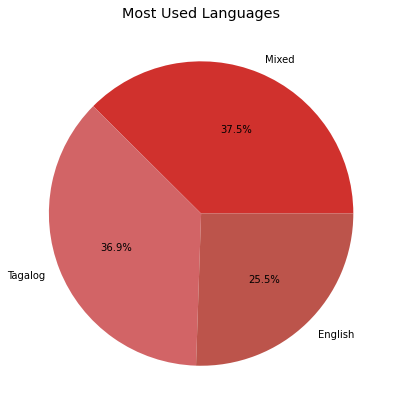

In [17]:
all_tweets_df["Language"].value_counts().head(3).plot(kind="pie", labels=["Mixed", "Tagalog", "English"], autopct="%.1f%%",
                                                     colors=["#D0312D", "#D26466", "#BC544B"], title="Most Used Languages",
                                                     figsize=(7,7))
plt.ylabel("")

In [71]:
pd.DatetimeIndex(all_tweets_df["Datetime"]).day.value_counts()

5    13971
6     6160
7     3982
8     1247
4        6
Name: Datetime, dtype: int64

([<matplotlib.axis.XTick at 0x15293ffdd00>,
 [Text(0, 0, 'Oct. 4'),
  Text(1, 0, 'Oct. 5'),
  Text(2, 0, 'Oct. 6'),
  Text(3, 0, 'Oct. 7'),
  Text(4, 0, 'Oct. 9')])

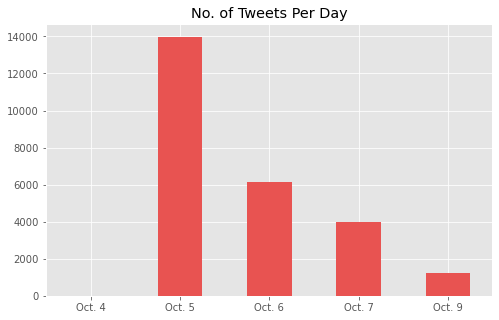

In [45]:
pd.DatetimeIndex(all_tweets_df["Datetime"]).day.value_counts().sort_index().plot(kind="bar", color="#e85351", 
                                                                                 title="No. of Tweets Per Day", figsize=(8,5))
plt.xticks(ticks=range(5), labels=["Oct. 4", "Oct. 5", "Oct. 6", "Oct. 7", "Oct. 8"], rotation=0)

In [72]:
all_tweets_df["Username"].value_counts().head(10)

maharlika001       501
loyalista24        235
01Juday            199
hearticedc         180
axeldijanabilar    169
Rbu48K             160
AllenReyFernan1    151
chard_maine2016    143
itsysabellaaa      143
SolidBBM           142
Name: Username, dtype: int64

<AxesSubplot:title={'center':'Top Usernames with Most Tweets'}>

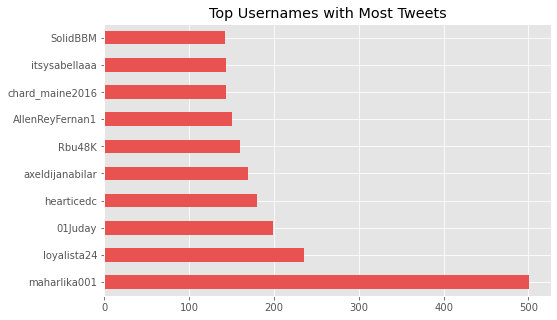

In [46]:
all_tweets_df["Username"].value_counts().head(10).plot(kind="barh", color="#e85351", 
                                                       title="Top Usernames with Most Tweets", figsize=(8,5))

In [40]:
all_tweets_df.loc[all_tweets_df["Verified"] == True, "Username"].value_counts()

ABSCBNNews    1
Name: Username, dtype: int64

In [39]:
all_tweets_df.loc[all_tweets_df["Verified"] == True]["Text"]

6988    #NeverAgain, #MarcosMagnanakaw VS #BBMIsMyPres...
Name: Text, dtype: object

In [41]:
pd.DatetimeIndex(all_tweets_df["AccountCreated"]).year.value_counts().sort_index()

2007        5
2008       10
2009      722
2010      996
2011      526
2012      582
2013      491
2014      503
2015      749
2016     1282
2017     1067
2018      984
2019     1526
2020     4063
2021    11860
Name: AccountCreated, dtype: int64

([<matplotlib.axis.XTick at 0x152940e2f10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

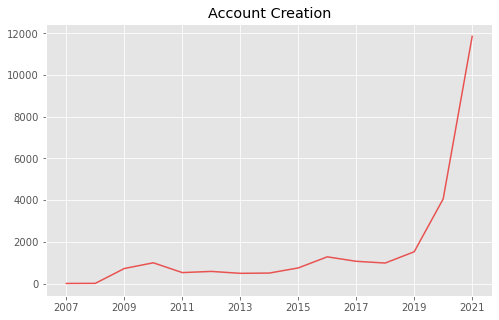

In [47]:
pd.DatetimeIndex(all_tweets_df["AccountCreated"]).year.value_counts().sort_index().plot(color="#e85351", 
                                                                                        title="Account Creation",
                                                                                        figsize=(8,5))
plt.xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021])

## Criteria Initialization
- Tweet from 2021-10-04 to 2021-10-09
- Hashtag #BBMIsMyPresident2022 is used
- Number of Following is greater than number of Followers
- Account created after 2018
- Number of Followers less than 100
- Account not Verified

In [48]:
criteria = (all_tweets_df["Following"] > all_tweets_df["Followers"]) & (pd.DatetimeIndex(all_tweets_df["AccountCreated"]).year > 2018) & (all_tweets_df["Followers"] < 100) & (all_tweets_df["Verified"] == False)

criteria_df = all_tweets_df.loc[criteria]

In [49]:
criteria_df

,Unnamed: 0,Datetime,Text,Language,Username,Verified,AccountCreated,Followers,Following,MentionedUsers
2,2,2021-10-04 12:38:17+00:00,#NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...,en,ferido_tobias,False,2021-09-26 02:39:02+00:00,9,56,NaN
3,3,2021-10-04 12:31:38+00:00,#NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...,en,JohnVillamonte,False,2021-10-04 05:12:27+00:00,3,19,NaN
9,9,2021-10-05 23:59:09+00:00,We already saw a widow cheat a Marcos twice. W...,en,WagBoboHa,False,2021-09-21 09:13:13+00:00,14,37,NaN
10,10,2021-10-05 23:59:08+00:00,#BBMIsMyPresident2022 go my president 💗💗✅,en,TenorioCess,False,2021-10-05 13:03:53+00:00,0,1,NaN
16,16,2021-10-05 23:58:03+00:00,#IskoIsMyPresident2022\n\nMy last resort is.\n...,en,QuaccWat,False,2020-05-25 01:47:10+00:00,36,161,NaN
...,...,...,...,...,...,...,...,...,...,...
25358,25358,2021-10-08 00:05:20+00:00,kaloka ung tweet ko kahapon umabot na sa kabil...,tl,spilldtruth,False,2021-10-04 17:22:46+00:00,46,79,NaN
25359,25359,2021-10-08 00:04:17+00:00,#BBMIsMyPresident2022 #solidregion3🙏🙏🙏🙏 https:...,und,lalicon_anne,False,2021-10-07 15:29:50+00:00,55,100,NaN
25360,25360,2021-10-08 00:03:42+00:00,Good morning! hoping for a great news sa last ...,en,spilldtruth,False,2021-10-04 17:22:46+00:00,46,79,NaN
25364,25364,2021-10-08 00:00:25+00:00,hypocrites\nas if hnd Yan sinasabi ng parents ...,tl,ReveCenona,False,2021-10-05 10:43:29+00:00,54,167,NaN


## Criteria-based Analysis

([<matplotlib.axis.XTick at 0x15291f9c100>,
 [Text(0, 0, 'Oct. 4'),
  Text(1, 0, 'Oct. 5'),
  Text(2, 0, 'Oct. 6'),
  Text(3, 0, 'Oct. 7'),
  Text(4, 0, 'Oct. 9')])

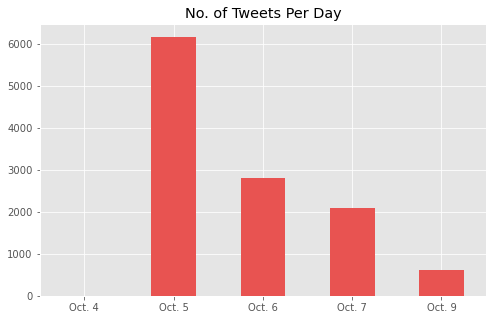

In [50]:
pd.DatetimeIndex(criteria_df["Datetime"]).day.value_counts().sort_index().plot(kind="bar", color="#e85351", 
                                                                                 title="No. of Tweets Per Day", figsize=(8,5))
plt.xticks(ticks=range(5), labels=["Oct. 4", "Oct. 5", "Oct. 6", "Oct. 7", "Oct. 8"], rotation=0)

(0.0, 185.0)

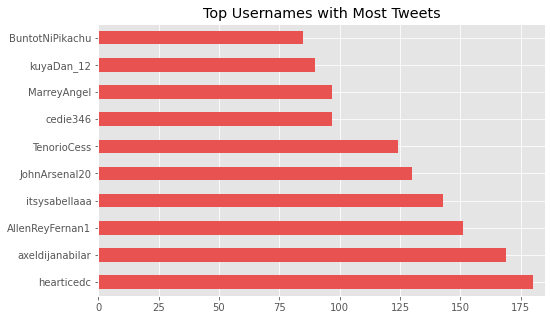

In [53]:
criteria_df["Username"].value_counts().head(10).plot(kind="barh", color="#e85351", 
                                                       title="Top Usernames with Most Tweets", figsize=(8,5))
plt.xlim(0,185)

## WordCloud - Most used words & hashtags (Whole)

In [11]:
import nltk
from nltk.tokenize import word_tokenize

all_words = []

for i in all_tweets_df["Text"]:
    tokenized_words = word_tokenize(i)
    for w in tokenized_words:   
        all_words.append(w.lower())

In [12]:
from nltk.corpus import stopwords

fil_stopwords = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami","marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad","tungkol","una","walang"]

eng_stopwords = stopwords.words("english")

# removed # to include hashtags
special_chars = [".", ",", "!", "@", "%", "&", "*", "(", ")", "'", '""', "+", "=", "-", ";", ":", "?", "’", "'s", "...",
                 "https", "t", "co", "t co", "https t"]

In [13]:
all_words2 = []

for word in all_words:
    if (word in fil_stopwords) or (word in eng_stopwords) or (word in special_chars) or (word.startswith("/")):
        continue
    all_words2.append(word)

In [14]:
all_in_sentence = ""

for w in all_words2:
    all_in_sentence += w + " "
    
# all_in_sentence 

(-0.5, 799.5, 399.5, -0.5)

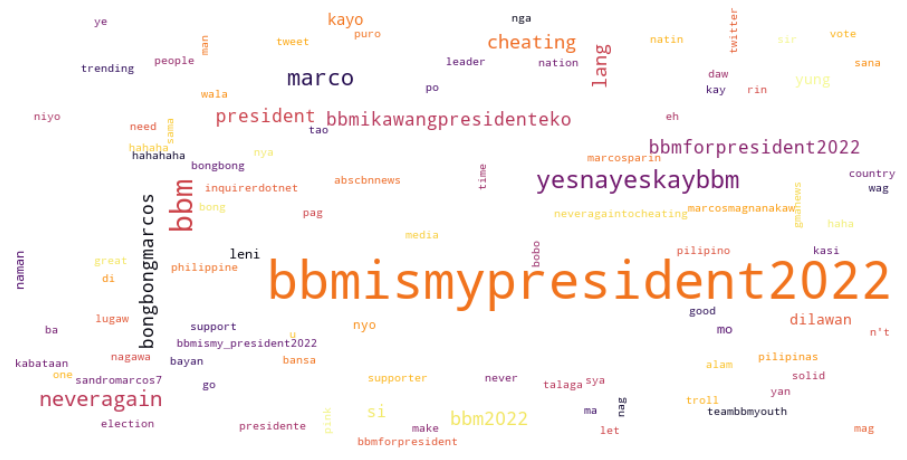

In [16]:
from wordcloud import WordCloud

word_cloud = WordCloud(width=800, height=400, background_color="white", max_words=100, 
                       stopwords=[], collocations=False, colormap="inferno").generate(all_in_sentence)
plt.figure(figsize=(16,12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")

## WordCloud - Most mentioned users (Whole)

In [6]:
from snscrape.modules.twitter import User

all_mentioned = []


for i in all_tweets_df["MentionedUsers"].fillna(0):
    if i == 0:
        continue
    
    all_mentioned.append(eval(i)[0].username)
    print(eval(i)[0].username)

inquirerdotnet
bongbongmarcos
acelight_
MiggySleepy
gmanews
WinstonRommel
achillestc
gmanews
gmanews
lamonista72
akosireekee
milkyway1969
gmanews
AlisonPereiraPH
ABSCBNNews
ianrobles_
DapatSiLeni
ABSCBNNews
inquirerdotnet
gmanews
bongbongmarcos
marcus5251962
MarreyAngel
gmanews
gmanews
gmanews
ABSCBNNews
TheDoctorLuck
gmanews
MarreyAngel
ABSCBNNews
milkyway1969
gmanews
ABSCBNNews
ABSCBNNews
1Sambayan
lenirobredo
BarundiaReyanne
sandromarcos7
kennethbeTrue
lamonista72
MJBautistaCPA
HaroldJamesGar2
bongbongmarcos
NovemberThird1
Makmak2207
ricovillapane
Roland03091979
ShaaWWie59
edgaralanpo
JohnMarkPetecio
Jendeukiilice1
KarenBecs
nixeily24
dlwrnctym
roginebiador
normsandrecio
bongbongmarcos
Katreng_03
jeffcanoy
hunterNim
ABSCBNNews
topsmam
j_vsor
hjdhjshj
TheJackForge
TisoyMDSays
justinejames_19
FanBoy_alipin
iamalizahbelle
akosireekee
gmanews
HaroldJamesGar2
MiggySleepy
ANCALERTS
FhqJackie
rick_joaquin
FhqJackie
airam_aseretSRK
bongbongmarcos
ABSCBNNews
John85073834
empresski_
smninews


PurpleHeart9197
janinegutierrez
BBMmalakas
rainfrfr
Gwendel89842445
MJBautistaCPA
yukicutie_
ganaba_n
sabbykeyt
candel002
BIENsays
fierylise
I_A_N_N_i
mardon_jr
ricky_balita
GailOrante
normsandrecio
Queens_Gambit18
ricky_balita
TeamBBMyouth
mrstlkt
JoePring_
emmanlagman
annacollins52
rainfrfr
AinahTweets
fierylise
ABSCBNNews
FhqJackie
ABSCBNNews
KDeeyy
evotistaPH
hearticedc
fierylise
GailOrante
ABSCBNNews
MindanaoForLeni
MiggySleepy
Katreng_03
TeamBBMyouth
jayeel_cornelio
rainfrfr
annacollins52
jmerczzzz
bongbongmarcos
jhonzalon
gmanews
bongbongmarcos
TedPylon
chard_maine2016
ABSCBNNews
ted05731954
ibibilang
GCoirin
inquirerdotnet
airam_aseretSRK
ingatannawa44
pisuj1210
kapuso_denise
MJBautistaCPA
ChelseaDar16
kapuso_denise
MJBautistaCPA
jayeel_cornelio
tammieboi
ddeonuloml_
icajks
HaroldJamesGar2
MJBautistaCPA
bongbongmarcos
janinegutierrez
KarenBecs
aryanapequeno
fierylise
natoreyes
MiggySleepy
iyreen911
dlwrnctym
superkerv
gabpangilinan
bongbongmarcos
andy_crush
janinegutierrez
Gohl

juverly_suerte
koooqs_
jhesz_dncln
pquaintrelle
lamonista72
lrnlbrs
kimalipao17
HaroldJamesGar2
patayIigaya
hrico_13
rowiebg_dct
BarundiaReyanne
KeithyG01
rapplerdotcom
SanErish
hjdhjshj
kylajessiern
JohnMarkPetecio
chard_maine2016
mava_b9
RomnichP
PurpleHeart9197
Kkeanu_14k
Michel008306587
Graceantonioco
bongbongmarcos
AbongMartino
ChubbyJhay8
milkyway1969
ahnjah_imnida
Roland03091979
01Juday
marichuedralin
PinoyAkoBlog
Tanjiro26302225
lamonista72
kylajessiern
bongbongmarcos
marloulowe
gnvrgs
fierylise
sandraguinaldo
Rye73533184
ABSCBNNews
Ella02455947
EmmaEiight
ZorenLlamas
karapatan
rapplerdotcom
iamalizahbelle
PurpleHeart9197
JimLhen
kapuso_denise
PurpleHeart9197
goodspeedshem
ShaaWWie59
HaroldJamesGar2
Whodasiscariot
QuenForce_Jhing
BiGf4tbItCh
j_vsor
airam_aseretSRK
TeamBBMyouth
MJBautistaCPA
PhilstarNews
jedy_lene
KarenBecs
macoyspatrol
imkate2004
Sandra_Aquino27
Sandra_Aquino27
rdelrosar8
bongbongmarcos
bongbongmarcos
Roxiferuel
Rangel001Rangel
News5PH
bongbongmarcos
bongbongma

mcFury613
LDESP8266
hrmcstllo
bongbongmarcos
PinoyAkoBlog
bongbongmarcos
sandromarcos7
manilabulletin
tayworlswiftie
bongbongmarcos
TedPylon
TeamBBMyouth
JUVY2004
TeamBBMyouth
FanBoy_alipin
bongbongmarcos
bongbongmarcos
bongbongmarcos
katnissevarlyn
TeamBBMyouth
bongbongmarcos
rdelrosar8
EvilWickedWitc1
manongmoferdie
bongbongmarcos
bongbongmarcos
jaicabajar
manongmoferdie
itzmejreyes
Rissesky
macoyspatrol
Sandra_Aquino27
PilStarNgayon
lenirobredo
cnnphilippines
FhqJackie
vicegandako
TeamBBMyouth
GailOrante
rapplerdotcom
vicegandako
free_fighter24
ABSCBNNews
eyerishdotPH
inquirerdotnet
KeithyG01
aldriengonzales
TeamBBMyouth
TeamBBMyouth
TeamBBMyouth
EdTheUnworthy
gmanews
TeamBBMyouth
bongbongmarcos
Sandra_Aquino27
caratuts
bongbongmarcos
whoopskiby
RyanRZambrano
itxmewilmer
indayevarona
patayIigaya
charlenejawid
roginebiador
patayIigaya
MrFrankBaraan
bongbongmarcos
daksngbohol69
bongbongmarcos
FierceTita
PilStarNgayon
marvveus
BIENsays
bongbongmarcos
bongbongmarcos
bongbongmarcos
manon

imkate2004
cnnphilippines
cnnphilippines
News5PH
MamaHopia
ANCALERTS
News5PH
KeithyG01
itsmejustine_08
loidasandiego77
wadabhubag
jcpunongbrgy
marortoll
kuya_daddy
agot_isidro
babykosipoleng_
dozZ3h_Vbril
MamaHopia
ISANDROnly
ABSCBNNews
gwapong_pinoy
PhilippineStar
iskonglasalista
SaltAndReality
jeffcanoy
PinasAngInaNyo
ColmenaresPH
PhilippineStar
MJBautistaCPA
PhilippineStar
Agent_Lisa0
Rhekae22
marortoll
IndayM28
wadabhubag
lunalouh_
roncerod
Vagnarok1
bongbongmarcos
maichardbibis1
dReyDreymz0810
AlfredoGenom
iamcrtfdg
iamcrtfdg
bongbongmarcos
KorekKaJohn
KorekKaJohn
KorekKaJohn
KeithyG01
KorekKaJohn
KorekKaJohn
maichardbibis1
wadabhubag
Uno19074948
bongbongmarcos
agot_isidro
guingonabart
TheDoctorLuck
ThisThiccRod
ABSCBNNews
helterskelltr
princem424
DapatSiLeni
bongbongmarcos
itsmejustine_08
RoniloXia
sandromarcos7
acelight_
bongbongmarcos
LakasNgTimog
ChelDiokno
lianbuan
SenLeiladeLima
bongbongmarcos
sassrogando
reyna_elena
bongbongmarcos
agot_isidro
aldenrichards02
agot_isidro
DDS

Eclarina1Reciel
manilabulletin
soltaule
jvejercito
bongbongmarcos
rougekei
acelight_
BBM20222
ComPangit
dezz_ganda
yagbolsjade
Ace_R06
bongbongmarcos
justinejames_19
JanineSquad
manilabulletin
the_jnnllgnsl
bongbongmarcos
cmdanyyy
TheNorth_BBM
acousticism
ellainearabia28
pinoyanghang
Wellwel04875877
ibanahBabe
PilStarNgayon
metabvco
EslEric
manilabulletin
lenirobredo
bongbongmarcos
PilipinasScm
wadabhubag
LakasNgTimog
acelight_
AbongMartino
LakasNgTimog
ANCALERTS
ABSCBNNews
pmjamilla
ahnjah_imnida
soltaule
KimEd29
Roland03091979
Lupusregina3
jcpunongbrgy
News5PH
nixonapun
cnnphilippines
Bahaghari_PH
bongbongmarcos
enerielad19
ANCALERTS
ABSCBNNews
DickGordonDG
raphraph27
siaps9
afhla07
twitnilian
jcpunongbayan
ABSCBNNews
twitnilian
inquirerdotnet
Loyalis95826192
xdonnybabeszx
PHTVandFilmUPD
risahontiveros
starfish131996
afhla07
lenirobredo
jauhnetienne
afhla07
SaltAndReality
YouTube
SaltAndReality
assortedge
YouTube
SANicolas15
bongbongmarcos
AbanteNews
SaltAndReality
Aljohn92_
inquirer

MillenialIndio
UPBaguioUSC
ABSCBNNews
CryptoZy13
inquirerdotnet
diamondz_yellow
KeithyG01
acelight_
MJE0792Jeitoso
FhqJackie
cnnphilippines
bongbongmarcos
inquirerdotnet
MONTEROX99
AksyonRadyo720
popoy0718
rapplerdotcom
OncexaT
LakasNgTimog
LakasNgTimog
oskeetv
inquirerdotnet
FhqJackie
diamondz_yellow
rommelpmedina
rjpayathought
bongbongmarcos
loidasandiego77
baby_boi_25
not_turkish
YouTube
ZorenLlamas
rapplerdotcom
smninews
baby_boi_25
baby_boi_25
yourscutee
baby_boi_25
iamRaoulManuel
YearoftheMonSy
janinegutierrez
MJBautistaCPA
Baste09451914
DudeSabarita
DudeSabarita
baby_boi_25
DudeSabarita
DudeSabarita
gmanews
bongbongmarcos
baby_boi_25
ABSCBNNews
baby_boi_25
MJBautistaCPA
aybaklush
aybaklush
iRBonito
RyaanFEP
bongbongmarcos
acelight_
edgaralanpo
kiaratorri
TheDoctorLuck
JoshMamba24_8
JoshMamba24_8
janinegutierrez
johnanthony_j
popoy0718
LakasNgTimog
JoshMamba24_8
akosireekee
JoshMamba24_8
lucky_comia
DeLegazpiYLopez
janinegutierrez
ABSCBNNews
arlene2917
iRBonito
jcpunongbrgy
sassr

YouTube
iamsuperbianca
milkyway1969
AELLAVOLZKI
Dapitancity143
lenirobredo
ntzch_l
milkyway1969
ElisaMarieSerr2
MiggySleepy
GoldDaMindanao
MJBautistaCPA
QMotherGothel
Dapitancity143
rezjapphil
annaduriasssss
sandromarcos7
RyanRZambrano
BreadLupita
juliafreshh_
bongbongmarcos
rezjapphil
sandromarcos7
bilalphx
maichardbibis1
GoldDaMindanao
juliafreshh_
chrstymymrtnz09
ElisaMarieSerr2
bongbongmarcos
annakate111
Jdv37200424
chrstymymrtnz09
lasang_
MiggySleepy
UlyssisJohn
rurilazuee
sosyolohija
MarcosPaRin22
sandromarcos7
IndayM28
Athena49749725
aikarobredo
annaduriasssss
soltaule
clavelalexis23
bongbongmarcos
wadabhubag
clavelalexis23
forthenationPH
MamaHopia
forthenationPH
MavenVenus
bongbongmarcos
cnnphilippines
ApatheticDame
jcpunongbayan
forthenationPH
selflessmomma
xarrrrrrah_zara
Gorgeousjian
rapplerdotcom
iamshoberamos
bongbongmarcos
gideonlasco
cnnphilippines
cnnphilippines
bongbongmarcos
ElisaMarieSerr2
bongbongmarcos
lenirobredo
PTVph
bongbongmarcos
TedTe
PhilippineStar
MiLady_Li

senmiriam
gibe1968
lav2heart14
Geedalee
bongbongmarcos
TishaCM
multiworldz
gmanews
Cedric_Litle
BeMauiwose
hazelisse
angelsofal
TheRarestJade
riitsii
itsspringtae
Ahzel_ica
angelsofal
hypbtsxx
rom
angelsofal
manilabulletin
juliafreshh_
News5PH
enchongdee777
MrFrankBaraan
giasison
angelsofal
bongbongmarcos
rezjapphil
MiLady_Ligaya
cnnphilippines
bongbongmarcos
LakanPintado
TheDoctorLuck
andrewspring111
DZMMTeleRadyo
TeamBbm2022
bongbongmarcos
casxmendoxa
multiworldz
angelsofal
pinoyanghang
cnnphilippines


In [7]:
all_in_mentioned = ""

for w in all_mentioned:
    all_in_mentioned += w + " "

all_in_mentioned

'inquirerdotnet bongbongmarcos acelight_ MiggySleepy gmanews WinstonRommel achillestc gmanews gmanews lamonista72 akosireekee milkyway1969 gmanews AlisonPereiraPH ABSCBNNews ianrobles_ DapatSiLeni ABSCBNNews inquirerdotnet gmanews bongbongmarcos marcus5251962 MarreyAngel gmanews gmanews gmanews ABSCBNNews TheDoctorLuck gmanews MarreyAngel ABSCBNNews milkyway1969 gmanews ABSCBNNews ABSCBNNews 1Sambayan lenirobredo BarundiaReyanne sandromarcos7 kennethbeTrue lamonista72 MJBautistaCPA HaroldJamesGar2 bongbongmarcos NovemberThird1 Makmak2207 ricovillapane Roland03091979 ShaaWWie59 edgaralanpo JohnMarkPetecio Jendeukiilice1 KarenBecs nixeily24 dlwrnctym roginebiador normsandrecio bongbongmarcos Katreng_03 jeffcanoy hunterNim ABSCBNNews topsmam j_vsor hjdhjshj TheJackForge TisoyMDSays justinejames_19 FanBoy_alipin iamalizahbelle akosireekee gmanews HaroldJamesGar2 MiggySleepy ANCALERTS FhqJackie rick_joaquin FhqJackie airam_aseretSRK bongbongmarcos ABSCBNNews John85073834 empresski_ smninews

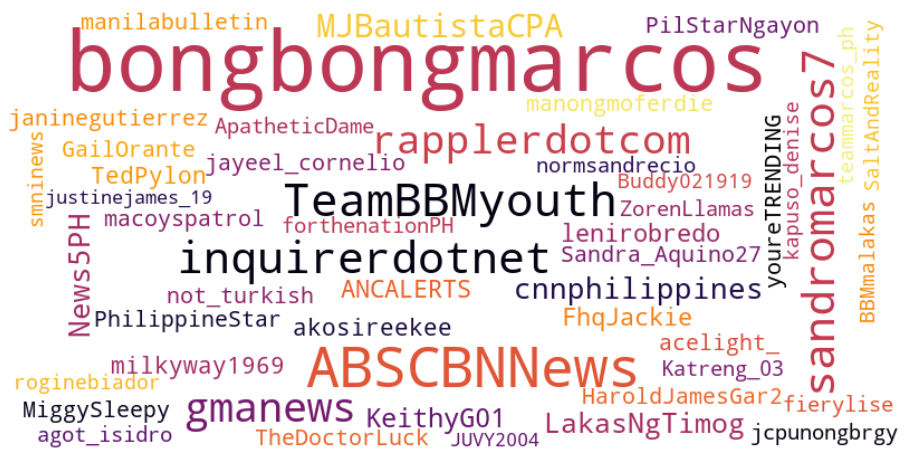

In [10]:
from wordcloud import WordCloud

word_cloud = WordCloud(width=800, height=400, background_color="white", max_words=50, 
                       stopwords=[], collocations=False, colormap="inferno").generate(all_in_mentioned)
plt.figure(figsize=(16,12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()